# Preparing the data

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
pd.set_option("display.precision", 4)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_theme(style = 'white')

# Classification models and metrics
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Loading the dataset
df = pd.read_csv('Data.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying Kernel PCA

In [2]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf', random_state = 42)
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

# Training the Classifiers on Kernel PCA values

In [3]:
def list_classifiers():
    classifiers = {
        'Logistic Regression' : LogisticRegression(random_state = 42),
        'K-Nearest Neighbors' : KNeighborsClassifier(n_neighbors = 5, p = 2, 
                                                     metric = 'minkowski'),
        'Support Vector Machine' : SVC(kernel = 'linear', random_state = 42),
        'Kernel SVM' : SVC(kernel = 'rbf', random_state = 42),
        'Naive Bayes' : GaussianNB(),
        'Decision Tree' : DecisionTreeClassifier(criterion = 'entropy', 
                                                 random_state = 42),
        'Random Forest' : RandomForestClassifier(n_estimators=100, 
                                                 criterion='entropy',
                                                 random_state = 42),
    }
    return classifiers

# Get the classifiers
classifiers = list_classifiers()
score = {name : [] for name in list(classifiers.keys())} 
for name, classifier in classifiers.items():
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  score[name].append(f1_score(y_test, y_pred, average = 'weighted'))
  score[name].append(accuracy_score(y_test, y_pred))

In [4]:
result = pd.DataFrame(score.values(), columns = ['f1 score', 'Accuracy'], 
                      index = score.keys())
result.style

,f1 score,Accuracy
Logistic Regression,1.0000,1.0000
K-Nearest Neighbors,0.9776,0.9778
Support Vector Machine,0.9559,0.9556
Kernel SVM,0.9777,0.9778
Naive Bayes,0.9559,0.9556
Decision Tree,0.9778,0.9778
Random Forest,0.9778,0.9778


# Visualizing the Results of Logistic Regression

In [5]:
def visualize(X, y, model, model_name, mode = 'Training'):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
        
    plt.title(model_name + ' (' + mode + ' set)', size = 16)
    plt.xlabel('PC1', size = 12)
    plt.ylabel('PC2', size = 12)
    plt.legend()
    plt.show()

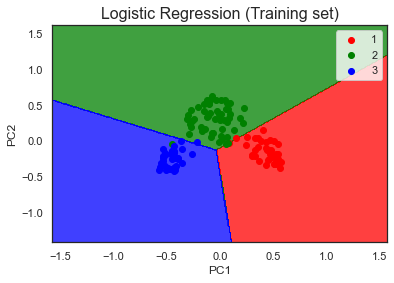

In [6]:
# Train the Logistic Regression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

# Visualize the Training results
visualize(X_train, y_train, lr, 'Logistic Regression', mode = 'Training')

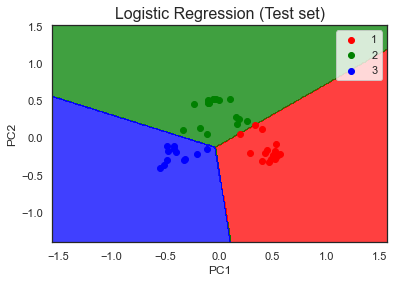

In [7]:
# Visualize the Test results
visualize(X_test, y_test, lr, 'Logistic Regression', mode = 'Test')